In [0]:
import random
import itertools

In [0]:
# What's on the die faces
die_faces = (3, 4, 9)

# Number of dice rolled by players for their turn
n_dice = 3

# Number of dice used to determine winning point total
n_dice_win = 2

In [0]:
# Pre-compute all the possible winning point totals 
# hint: it's fixed and all are equally likely (are they?)
all_win_combinations = list(itertools.product(die_faces, repeat=n_dice_win))
all_win_totals = tuple(map(lambda dice: int(str(dice[0]) + str(dice[1])), all_win_combinations))

In [0]:
# Pre-compute all the possible player rolls and their possible totals
# this is a 2D structure, 
#    one entry for each possible roll combination
#    then all the possible addition and subtraction combinations for the roll
def possible_roll_totals(dice):
  results = set()
  # ---
  results.add(- dice[0] - dice[1] - dice[2])
  # --+
  results.add(- dice[0] - dice[1] + dice[2])
  # -+-
  results.add(- dice[0] + dice[1] - dice[2])
  # -++
  results.add(- dice[0] + dice[1] + dice[2])
  # +--
  results.add(+ dice[0] - dice[1] - dice[2])
  # +-+
  results.add(+ dice[0] - dice[1] + dice[2])
  # ++-
  results.add(+ dice[0] + dice[1] - dice[2])
  # +++
  results.add(+ dice[0] + dice[1] + dice[2])
  return list(results)

all_roll_combinations = list(itertools.combinations_with_replacement(die_faces, n_dice))
all_roll_totals = {}
for dice in list(all_roll_combinations):
    all_roll_totals[dice] = tuple(possible_roll_totals(dice))


In [0]:
# Pre-compute maximum possible roll value
# An optimization to get close to the target (win) value quickly
max_roll_value = max(die_faces) * n_dice

In [0]:
def roll_dice():
  """Simulate a roll of n_dice with die_faces on them and returns a list of the results."""
  return tuple(sorted(random.choices(die_faces, k=n_dice)))


In [225]:
print(all_win_totals)
print(all_roll_totals)
print(roll_dice())
print(max_roll_value)
random.choice(all_win_totals)

(33, 34, 39, 43, 44, 49, 93, 94, 99)
{(3, 3, 3): (9, 3, -3, -9), (3, 3, 4): (2, 4, 10, -10, -4, -2), (3, 3, 9): (3, 9, 15, -15, -9, -3), (3, 4, 4): (3, 5, 11, -11, -5, -3), (3, 4, 9): (2, 8, 10, -16, 16, -10, -8, -2), (3, 9, 9): (3, -21, 15, -15, 21, -3), (4, 4, 4): (4, 12, -12, -4), (4, 4, 9): (1, 9, -17, 17, -9, -1), (4, 9, 9): (4, -22, 14, -14, 22, -4), (9, 9, 9): (9, 27, -27, -9)}
(3, 3, 4)
27


49

In [0]:
def play_game(show_progress = False):
  """Simulate a game and reuturn the number of turns to win."""
  turns = 0
  current_points = 0
  win_points = random.choice(all_win_totals)
  
  if show_progress:
    print('GAME: win = {} points'.format(win_points))
  while current_points != win_points:
    dice = roll_dice()
    if show_progress:
      print('TURN {}: points = {}, roll = {}, '.format(turns, current_points, dice), end='')
    
    # Optimize when current points is far below win_points
    if current_points + sum(dice) < win_points:
      turn_points = sum(dice)
      if show_progress:
        print('best = {}'.format(turn_points))
    else:
      target_choice = win_points - current_points
      possible_combinations = all_roll_totals[dice]
      turn_points = min(possible_combinations, key=lambda x:abs(x-target_choice))
      if show_progress:
        print('possible = {}, best = {}'.format(possible_combinations, turn_points))

    current_points += turn_points
    turns += 1
      
  return (turns, win_points)
    

In [273]:
play_game(True)

GAME: win = 99 points
TURN 0: points = 0, roll = (3, 3, 4), best = 10
TURN 1: points = 10, roll = (3, 4, 9), best = 16
TURN 2: points = 26, roll = (4, 4, 9), best = 17
TURN 3: points = 43, roll = (3, 3, 9), best = 15
TURN 4: points = 58, roll = (4, 9, 9), best = 22
TURN 5: points = 80, roll = (3, 3, 4), best = 10
TURN 6: points = 90, roll = (4, 9, 9), possible = (4, -22, 14, -14, 22, -4), best = 4
TURN 7: points = 94, roll = (4, 4, 9), possible = (1, 9, -17, 17, -9, -1), best = 1
TURN 8: points = 95, roll = (3, 4, 9), possible = (2, 8, 10, -16, 16, -10, -8, -2), best = 2
TURN 9: points = 97, roll = (3, 3, 9), possible = (3, 9, 15, -15, -9, -3), best = 3
TURN 10: points = 100, roll = (4, 4, 9), possible = (1, 9, -17, 17, -9, -1), best = -1


(11, 99)

In [325]:
# Play a bunch of games and accumulate the number of turns and the win_points..
games = []
for g in range(250000):
  games.append(play_game())
  
  
print(games)

[(4, 49), (10, 44), (4, 33), (6, 34), (5, 49), (5, 99), (4, 43), (15, 39), (21, 49), (6, 34), (7, 39), (8, 94), (5, 43), (6, 44), (6, 33), (8, 94), (8, 39), (6, 44), (15, 93), (5, 33), (4, 33), (8, 44), (6, 43), (9, 34), (5, 49), (16, 99), (9, 94), (11, 39), (4, 49), (6, 33), (7, 93), (9, 94), (8, 44), (10, 99), (6, 34), (13, 99), (6, 44), (6, 94), (7, 94), (3, 34), (4, 39), (7, 94), (12, 44), (29, 94), (30, 94), (3, 39), (7, 44), (2, 44), (12, 34), (9, 44), (18, 39), (3, 34), (2, 34), (8, 33), (4, 43), (11, 99), (34, 99), (4, 43), (3, 43), (7, 33), (3, 33), (9, 44), (7, 49), (3, 33), (8, 44), (11, 94), (15, 94), (6, 93), (4, 43), (8, 44), (5, 34), (4, 49), (10, 44), (5, 33), (14, 43), (13, 34), (25, 39), (7, 99), (9, 49), (2, 39), (4, 49), (11, 44), (9, 33), (6, 93), (8, 94), (6, 93), (5, 34), (7, 99), (4, 44), (7, 39), (12, 93), (12, 49), (10, 43), (2, 33), (9, 94), (21, 43), (6, 99), (11, 94), (4, 44), (3, 39), (2, 43), (11, 99), (6, 33), (3, 44), (4, 49), (25, 49), (15, 94), (5, 33

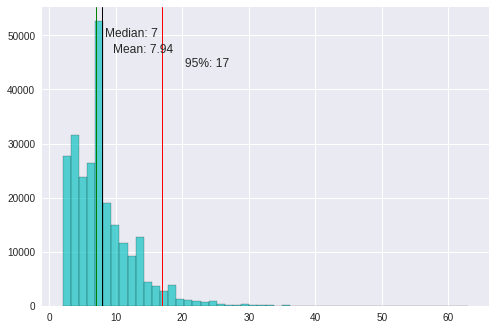

In [358]:
# Plot simple histogram of number of turns needed to win

import matplotlib.pyplot as plt
import numpy as np

np_games = np.array(games)

x = np_games[:,0]
#y = np_games[:,1]

n, bins, patches = plt.hist(x, bins=50, color='c', edgecolor='k', alpha=0.65)
_, max_ = plt.ylim()

median_turns = np.median(x)
_ = plt.axvline(median_turns, color='g', linewidth=1)
_ = plt.text(median_turns + median_turns/5, max_ - max_/10, 'Median: {:.0f}'.format(median_turns))

mean_turns = x.mean()
_ = plt.axvline(mean_turns, color='k', linewidth=1)
_ = plt.text(mean_turns + mean_turns/5, max_ - max_/6.5, 'Mean: {:.2f}'.format(mean_turns))

ninety_percent_turns = np.percentile(x, 95) 
_ = plt.axvline(ninety_percent_turns, color='r', linewidth=1)
_ = plt.text(ninety_percent_turns + ninety_percent_turns/5, max_ - max_/5, '95%: {:.0f}'.format(ninety_percent_turns))